<a href="https://colab.research.google.com/github/tirthpatel7498/Classroom-Bot/blob/master/ECE542_Hw03a_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Convolutional Neural Networks**

In this notebook, we will explore some of the basic tools for regularization and hyper-parameter tuning for neural networks.



In [1]:
%tensorflow_version 1.x
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout

from tensorflow.keras import regularizers

from keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

TensorFlow 1.x selected.


Using TensorFlow backend.


## Load and Splitting Data

We Will make use of the CIFAR10 dataset.

In [2]:
# Loading train and test dataset
(trainingX, trainingY), (testX, testY) = cifar10.load_data()
labels = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

# Keeping 20% for Validation
valid_set_pc = 0.2
split= int((len(trainingX))*(1-valid_set_pc))

validX = trainingX[split:]
validY = trainingY[split:]

trainX = trainingX[:split]
trainY = trainingY[:split]

ship


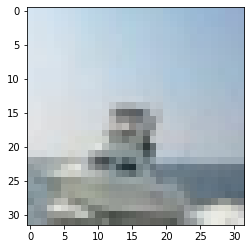

In [3]:
# Showing a samples from the dataset
sampleID = 100
plt.imshow(trainX[sampleID])
print(labels[trainY[sampleID][0]])

In [4]:
# Convert from integers to floats
trainingX = trainingX.astype('float32')
trainX = trainX.astype('float32')
validX = validX.astype('float32')
testX  = testX.astype('float32')

# Normalize to range 0-1
trainingX = trainingX / 255.0
trainX = trainX / 255.0
validX = validX / 255.0
testX  = testX / 255.0

# One-hot encoding of outputs
trainingY = to_categorical(trainingY)
trainY = to_categorical(trainY)
validY = to_categorical(validY)
testY  = to_categorical(testY)

## Training a Base CNN Model

In [5]:
# Defining Base CNN Model
def define_base_model():
	model = Sequential()
 
	model.add(Conv2D(256, (3, 3), activation='relu',  padding='same', input_shape=(32, 32, 3)))
	model.add(MaxPooling2D((2, 2)))
 
	model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
	model.add(MaxPooling2D((2, 2)))
 
	model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
	model.add(MaxPooling2D((2, 2)))
 
	model.add(Flatten())
	model.add(Dense(1024, activation='relu'))
	model.add(Dense(10, activation='softmax'))
 
	return model

# Creating an instance
base_model = define_base_model()
base_model.summary()
base_model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         
______________________________________

In [6]:
# Training base model
base_history = base_model.fit(trainX, trainY, epochs=15, validation_data=(validX, validY), verbose=1)


Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 16s 395us/step - loss: 2.0384 - accuracy: 0.2619 - val_loss: 1.7989 - val_accuracy: 0.3355
Epoch 2/15
40000/40000 [==============================] - 14s 355us/step - loss: 1.6542 - accuracy: 0.4083 - val_loss: 1.5246 - val_accuracy: 0.4614
Epoch 3/15
40000/40000 [==============================] - 14s 353us/step - loss: 1.4551 - accuracy: 0.4774 - val_loss: 1.4018 - val_accuracy: 0.4979
Epoch 4/15
40000/40000 [==============================] - 14s 352us/step - loss: 1.3318 - accuracy: 0.5260 - val_loss: 1.3283 - val_accuracy: 0.5367
Epoch 5/15
40000/40000 [==============================] - 14s 352us/step - loss: 1.2253 - accuracy: 0.5670 - val_loss: 1.2083 - val_accuracy: 0.5720
Epoch 6/15
40000/40000 [==============================] - 14s 351us/step - loss: 1.1263 - accuracy: 0.6075 - val_loss: 1.1188 - val_accuracy: 0.6078
Epoch 7/15
40000/40000 [==============================]

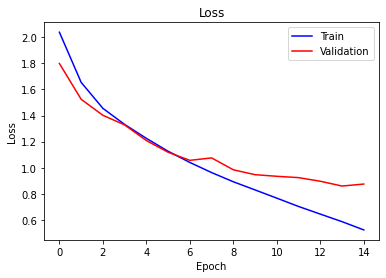

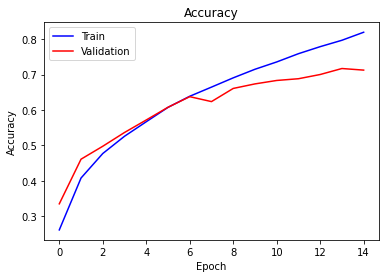

In [7]:
# Defining a function for plotting training and validation learning curves
def plot_history(history):
	  # plot loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    
    # plot accuracy
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
  
plot_history(base_history)

# **[Task 1] Comparing Optimizers**

The goal of of this section is to compare the performance of various optimizers: SGD with momentum, RMS Prop and Adam. Make sure you complete the following steps:

1. Train the network with SGB with momentum
2. Train the network with RMS Prop
3. Train the network with Adam
4. Create two plots showing accuracy for the training and validation sets
5. Comment on the performance of each optimizer. Which one had the steepest learning curve? Which one gave the final best performance? 




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

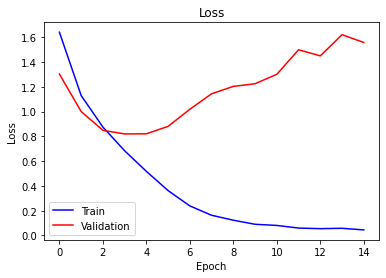

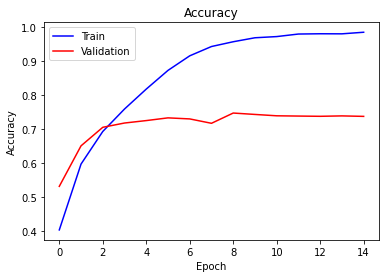

In [8]:
# TODO - Training model with momentum 
momentum_model = define_base_model()
momentum_model.summary()
momentum_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

momentum_history = momentum_model.fit(trainX, trainY, epochs=15, validation_data=(validX, validY), verbose=1)

plot_history(momentum_history)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

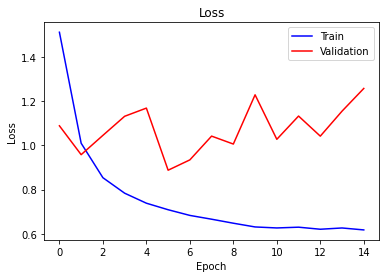

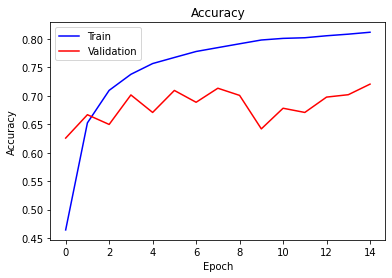

In [9]:
# TODO - Training model with RMS Prop
rms_model = define_base_model()
rms_model.summary()
rms_model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rms_history = rms_model.fit(trainX, trainY, epochs=15, validation_data=(validX, validY), verbose=1)

plot_history(rms_history)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

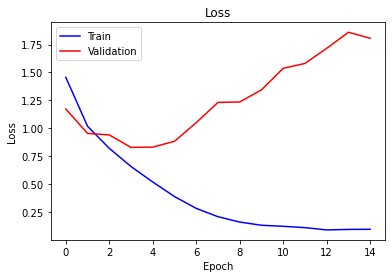

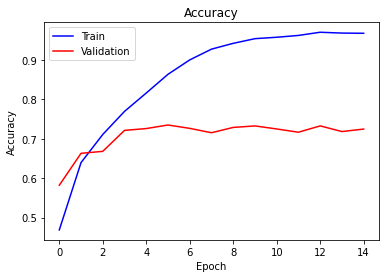

In [10]:
# TODO - Training model with Adam
adam_model = define_base_model()
adam_model.summary()
adam_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

adam_history = adam_model.fit(trainX, trainY, epochs=15, validation_data=(validX, validY), verbose=1)

plot_history(adam_history)

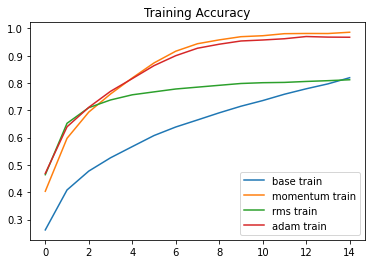

In [13]:
# TODO - Plotting training accuracy
plt.title('Training Accuracy')
plt.plot(base_history.history['accuracy'], label='base train')
plt.plot(momentum_history.history['accuracy'], label='momentum train')
plt.plot(rms_history.history['accuracy'], label='rms train')
plt.plot(adam_history.history['accuracy'], label='adam train')
plt.legend()
plt.show()

[TODO - Add your observations]



# **[Task 2] Applying Standard Regularization**

The goal of this section is to compare the effect of different normalization approaches including Batch normalization and Dropout. Make sure to complete the following steps:

1. Create a new model by adding a batch normalization layer after each convolutional layer and between the dense layers of the base model. Train it using the Adam optimizer.
2. Create a new model by adding dropout after each convolutional layer and between the dense layers of the base model with a rate equal to $0.2$. Train it using the Adam optimizer.
3. Create two plots showing accuracy for the training and validation sets comparing the regularized versions against the base model trained with the Adam optimizer.
4. Comment on the performance of each model. Which one had the steepest learning curve? Which one gave the final best performance? 




In [16]:
# TODO - Defining Batch Normalization model and training it
def define_base_model_BN():
  model = Sequential()
  model.add(Conv2D(256, (3, 3), activation='relu',  padding='same', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='softmax'))
  return model


adam_model_BN = define_base_model_BN()
adam_model_BN.summary()
adam_model_BN.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

adam_history_BN = adam_model_BN.fit(trainX, trainY, epochs=15, validation_data=(validX, validY), verbose=1)



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 256)       7168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 256)       590080    
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 256)       1024      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 256)        

In [17]:
# TODO - Defining dropout regularized model and training it
def define_base_model_Dropout():
  model = Sequential()
  model.add(Conv2D(256, (3, 3), activation='relu',  padding='same', input_shape=(32, 32, 3)))
  model.add(Dropout(0.2))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
  model.add(Dropout(0.2))
  model.add(MaxPooling2D((2, 2)))
  
  model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
  model.add(Dropout(0.2))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
  return model


adam_model_Dropout = define_base_model_Dropout()
adam_model_Dropout.summary()
adam_model_Dropout.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

adam_history_Dropout = adam_model_Dropout.fit(trainX, trainY, epochs=15, validation_data=(validX, validY), verbose=1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 256)       7168      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 256)       590080    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 256)        

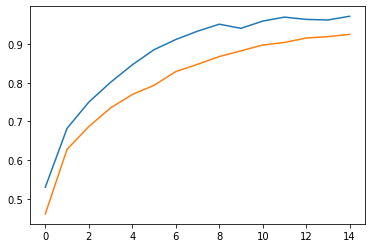

In [18]:
# TODO - Plotting training accuracy
plt.plot(adam_history_BN.history['accuracy'], label='Model with BN')
plt.plot(adam_history_Dropout.history['accuracy'], label='Model with Dropout')

[TODO - Add your observations]

# **[Task 3] Hyperparameter Tuning**

The objective of this section is to perform hyperparameter tuning of the network using a grid search. Make sure to complete these steps:

1. Perform a grid search for the optimal hyperparameters for the model with dropout regularization and Adam optimizer using the dropout values [0.1, 0.2, 0.3] and the learning rate values [0.1, 0.01, 0.001].
2. Display the results for the best model on the test dataset.

In [21]:
# TODO - Defining final model for optimization
def define_model_Dropout(d):
  model = Sequential()
  model.add(Conv2D(256, (3, 3), activation='relu',  padding='same', input_shape=(32, 32, 3)))
  model.add(Dropout(d))
  model.add(MaxPooling2D((2, 2)))
  
  model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
  model.add(Dropout(d))
  model.add(MaxPooling2D((2, 2)))
  
  model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
  model.add(Dropout(d))
  model.add(MaxPooling2D((2, 2)))
  
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(d))
  model.add(Dense(10, activation='softmax'))
  
  return model


dropout=[0.1, 0.2, 0.3]
lr = [0.1, 0.01, 0.001]

best_dropout = 0.1
best_lr = 0.1
max = 0

for d in dropout:
  model = define_model_Dropout(d)
  for l in lr:
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    model_history = model.fit(trainX, trainY, epochs=15, validation_data=(validX, validY), verbose=1)
    val_acc = model_history.history['val_accuracy']
    if val_acc[-1] > max:
      best_dropout = d
      best_lr = l



Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 24s 592us/step - loss: 1.4656 - accuracy: 0.4674 - val_loss: 1.1854 - val_accuracy: 0.5776
Epoch 2/15
40000/40000 [==============================] - 23s 582us/step - loss: 1.0276 - accuracy: 0.6345 - val_loss: 0.9366 - val_accuracy: 0.6701
Epoch 3/15
40000/40000 [==============================] - 23s 580us/step - loss: 0.8384 - accuracy: 0.7059 - val_loss: 0.8382 - val_accuracy: 0.7106
Epoch 4/15
40000/40000 [==============================] - 23s 576us/step - loss: 0.6864 - accuracy: 0.7589 - val_loss: 0.8148 - val_accuracy: 0.7124
Epoch 5/15
40000/40000 [==============================] - 23s 577us/step - loss: 0.5614 - accuracy: 0.8010 - val_loss: 0.7969 - val_accuracy: 0.7286
Epoch 6/15
40000/40000 [==============================] - 23s 580us/step - loss: 0.4554 - accuracy: 0.8404 - val_loss: 0.7931 - val_accuracy: 0.7344
Epoch 7/15
40000/40000 [==============================] 

In [24]:
# TODO - Displaying best parameters found
print("Best parameters are-> Dropout: ", best_dropout, " Learning rate: ", best_lr)

Best parameters are-> Dropout:  0.3  Learning rate:  0.001


In [23]:
final_model = model = define_model_Dropout(best_dropout)
final_model.compile(optimizer=Adam(learning_rate=best_lr), loss='categorical_crossentropy', metrics=['accuracy'])
final_model_history = final_model.fit(trainX, trainY, epochs=15, validation_data=(validX, validY), verbose=1)
result = final_model.evaluate(testX, testY)

print(result)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 24s 611us/step - loss: 1.5061 - accuracy: 0.4547 - val_loss: 1.3001 - val_accuracy: 0.5684
Epoch 2/15
40000/40000 [==============================] - 24s 592us/step - loss: 1.1035 - accuracy: 0.6101 - val_loss: 1.1145 - val_accuracy: 0.6304
Epoch 3/15
40000/40000 [==============================] - 24s 590us/step - loss: 0.9188 - accuracy: 0.6780 - val_loss: 0.9734 - val_accuracy: 0.6784
Epoch 4/15
40000/40000 [==============================] - 24s 591us/step - loss: 0.8191 - accuracy: 0.7124 - val_loss: 0.8832 - val_accuracy: 0.7231
Epoch 5/15
40000/40000 [==============================] - 24s 591us/step - loss: 0.7273 - accuracy: 0.7451 - val_loss: 0.8218 - val_accuracy: 0.7356
Epoch 6/15
40000/40000 [==============================] - 24s 591us/step - loss: 0.6564 - accuracy: 0.7663 - val_loss: 0.7895 - val_accuracy: 0.7456
Epoch 7/15
40000/40000 [==============================] 